 Objectives:










 Reading and displaying an image in python

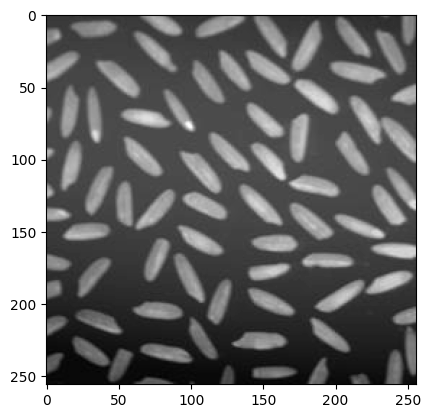

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
Image_test=img.imread("rice.jpg")
plt.imshow(Image_test,cmap='gray')

 Convert Images to another format and compare them

In [2]:
from PIL import Image
import os

with Image.open('rice.jpg') as img_test:
  img_test.save("output.png")
  img_test.save("output.tiff")
print("png", os.path.getsize('rice.jpg'))
print("jpeg", os.path.getsize('output.png'))
print("tiff", os.path.getsize('output.tiff'))

png 9324
jpeg 31966
tiff 65658


 Convert an Image to Grayscale and display

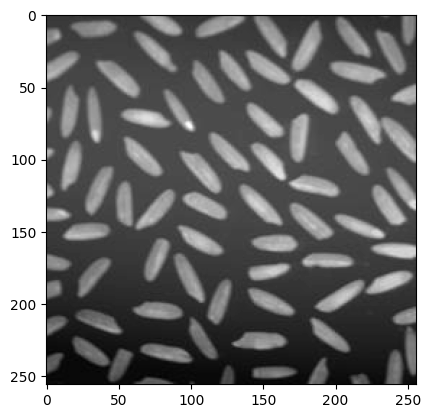

In [3]:
from PIL import Image,ImageOps
import cv2
im=Image.open('rice.jpg')
im2=ImageOps.grayscale(im)
plt.imshow(im2,cmap='gray')

 Perform Image enhancement operations



(array([[ 21.,  22.,  95., ...,   0.,   0.,   0.],
        [ 20.,  22.,  96., ...,   3.,   0.,   0.],
        [ 21.,  22.,  98., ...,   5.,   0.,   0.],
        ...,
        [  5.,  11., 112., ...,  10.,   9.,   0.],
        [  5.,  14., 116., ...,  10.,   9.,   0.],
        [  5.,  16., 121., ...,   6.,  10.,   0.]]),
 array([ 32. ,  54.3,  76.6,  98.9, 121.2, 143.5, 165.8, 188.1, 210.4,
        232.7, 255. ]),
 <a list of 256 BarContainer objects>)

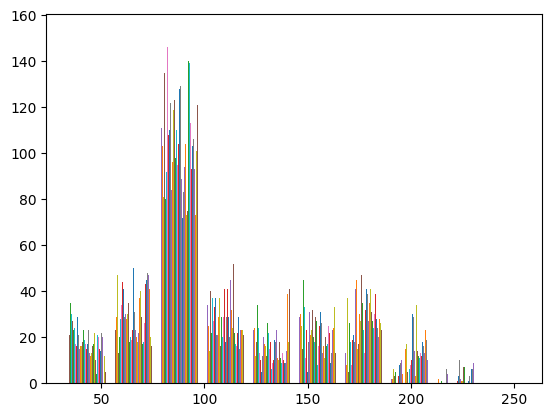

In [8]:
import cv2
image=cv2.imread('rice.jpg')
image_x_color=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_x_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.hist(image_x_gray)


Pixel Wise Thresholding

Thresholding Logic in Grayscale Image Processing Grayscale images have pixel values between 0 (black) and 255 (white). The code iterates over each pixel, turning values <220 black (0) and values ≥220 white (255), producing a binary image. This method is used in tasks like segmentation and object detection.

In [5]:

row,col=image_x_gray.shape
for i in range(row):
  for j in range(col):
    if image_x_gray[i][j]<220:
      image_x_gray[i][j]=0
    else:
      image_x_gray[i][j]=255




(array([[256.,   0.,   0., ...,   0.,   0.,   0.],
        [256.,   0.,   0., ...,   0.,   0.,   0.],
        [256.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [253.,   0.,   0., ...,   0.,   0.,   3.],
        [252.,   0.,   0., ...,   0.,   0.,   4.],
        [254.,   0.,   0., ...,   0.,   0.,   2.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 256 BarContainer objects>)

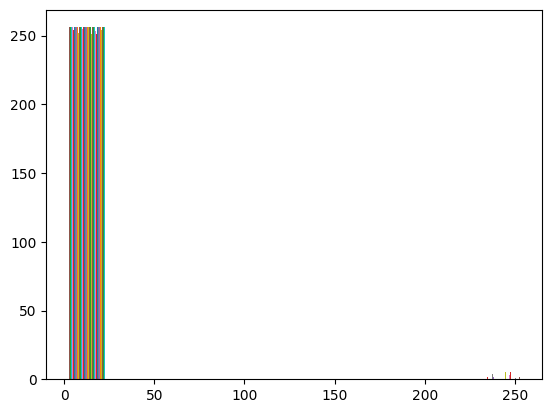

In [6]:
plt.hist(image_x_gray)

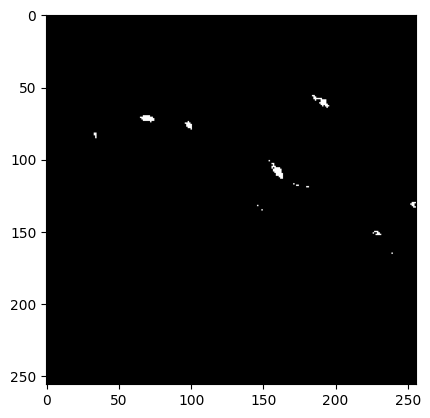

In [7]:
plt.imshow(image_x_gray,cmap='gray')

Color Inversion

This code performs color inversion on a grayscale image (image_x_gray). Each pixel's intensity value is subtracted from 255, effectively flipping the grayscale colors. For example, black (0) becomes white (255), white (255) becomes black (0), and intermediate gray values (e.g., 128) are inverted to their corresponding value (127). This creates a negative image effect.


In [9]:
row,col=image_x_gray.shape
for i in range(row):
  for j in range(col):
    image_x_gray[i][j]=255-image_x_gray[i][j]


(array([[  0.,   0.,   0., ...,  95.,  22.,  21.],
        [  0.,   0.,   3., ...,  96.,  22.,  20.],
        [  0.,   0.,   5., ...,  98.,  22.,  21.],
        ...,
        [  0.,   9.,  10., ..., 112.,  11.,   5.],
        [  0.,   9.,  10., ..., 116.,  14.,   5.],
        [  0.,  10.,   6., ..., 121.,  16.,   5.]]),
 array([  0. ,  22.3,  44.6,  66.9,  89.2, 111.5, 133.8, 156.1, 178.4,
        200.7, 223. ]),
 <a list of 256 BarContainer objects>)

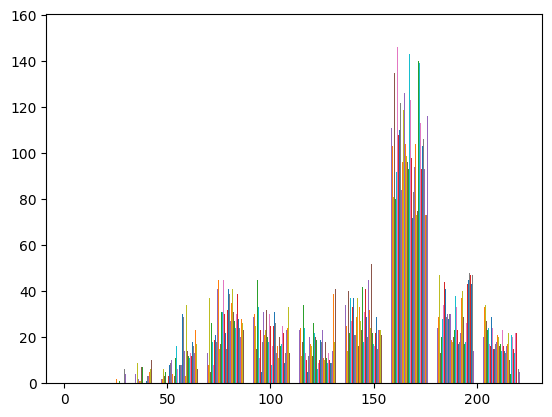

In [10]:
plt.hist(image_x_gray)

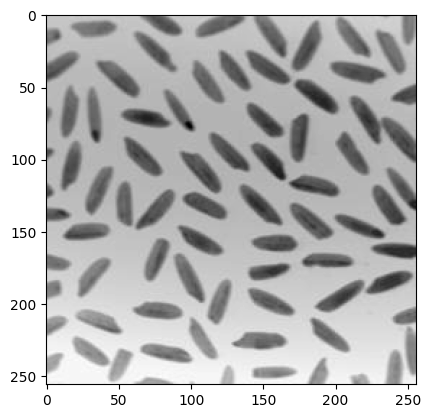

In [11]:
plt.imshow(image_x_gray,cmap='gray')

#Histogram Equalisation
A technique for enhancing the contrast of images, particularly grayscale ones.

Process:

1.Converts the image to grayscale (if necessary).

2.Builds a histogram of pixel values.


3.Computes the cumulative distribution function (CDF) for intensity mapping.

4.Maps pixels to new values using the CDF to spread out intensity levels.

Outcome:

1.Produces an equalized image with improved contrast.

2.Displays the original and equalized images alongside their respective histograms using matplotlib

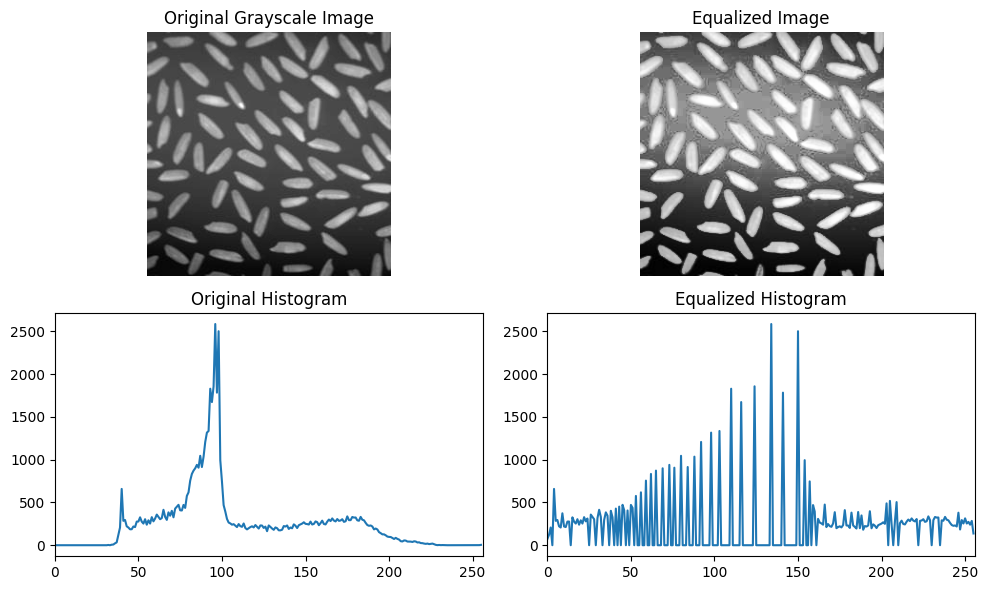

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def histogram_equalization(image_path):
    # Read the image
    sat_image= cv2.imread(image_path)
    #Convert to grayscale if needed
    if len(sat_image.shape) > 2:
        sat_image_gray = cv2.cvtColor(sat_image, cv2.COLOR_BGR2GRAY)
    else:
        sat_image_gray = sat_image.copy()

    histogram = np.zeros(256, dtype=int)
    for pixel in sat_image_gray.flatten():
        histogram[pixel] += 1
    # Calculate probability and CDF
    total_pixels = sat_image_gray.size
    probability = histogram / total_pixels
    cdf = np.cumsum(probability)
    # Calculate new pixel values
    L = 256  # Number of gray levels
    new_pixel_values = np.round(cdf * (L - 1)).astype(np.uint8)  # Round up to next greatest
    # Create equalized image
    equalized_image = new_pixel_values[sat_image_gray]


    # Display results
    plt.figure(figsize=(10, 6))
    # Original image
    plt.subplot(2, 2, 1)
    plt.title("Original Grayscale Image")
    plt.imshow(sat_image_gray, cmap="gray")
    plt.axis("off")
    # Equalized image
    plt.subplot(2, 2, 2)
    plt.title("Equalized Image")
    plt.imshow(equalized_image, cmap="gray")
    plt.axis("off")
    # Original histogram
    plt.subplot(2, 2, 3)
    plt.title("Original Histogram")
    plt.plot(histogram)
    plt.xlim([0, 256])
    # Equalized histogram
    hist_eq, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])
    plt.subplot(2, 2, 4)
    plt.title("Equalized Histogram")
    plt.plot(hist_eq)
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()
    return sat_image_gray, equalized_image, histogram, hist_eq, cdf, new_pixel_values

original, equalized, hist_orig, hist_eq, cdf, mapping = histogram_equalization('rice.jpg')
